# Conflicts time-series dataset released by ACLED

Link to the Conflicts data released by ACLED: https://acleddata.com/data-export-tool/

For more details, see the *README.md*.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
from matplotlib.lines import Line2D
import pandas as pd
import ntpath
import glob
# Set a value for the column width layout.
pd.options.display.max_colwidth = 20
plt.style.use("default")

In [2]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../../packages/")
from MapPlot.MapPlot import draw_adminstratas
from TsIP.TsIP import TsIP

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

In [4]:
# Read the data released by ACLED regarding the conflicts indicator.
path = "./ACLED_data/"
all_files = glob.glob(path + "*.csv")

dfs = []

for filename in all_files:
    df = pd.read_csv(filename)
    df["Country"] = ntpath.basename(filename).split(".")[0]
    dfs.append(df)

df = pd.concat(dfs, axis = 0, ignore_index = True)
# Delete duplicate rows if exist.
df = df.drop_duplicates()
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,Country
0,7683085,854,BFO4355,4355,11 February 2021,2021,1,Violence against...,Attack,Unidentified Arm...,...,12.3703,-1.5247,1,Radio Omega,National,On 11 February 2...,0,1613419899,BFA,Burkina Faso
1,7682575,854,BFO4352,4352,10 February 2021,2021,1,Violence against...,Abduction/forced...,Islamic State (G...,...,14.7813,0.0123,1,Facebook; Minute...,Local partner-Other,On 10 February 2...,0,1613419898,BFA,Burkina Faso
2,7682576,854,BFO4353,4353,10 February 2021,2021,1,Battles,Armed clash,Islamic State (G...,...,13.4637,-1.0086,1,Sahel Security A...,New media-National,On 10 February 2...,2,1613419898,BFA,Burkina Faso
3,7682906,854,BFO4354,4354,10 February 2021,2021,1,Strategic develo...,Looting/property...,JNIM: Group for ...,...,13.2319,-0.0012,1,Facebook,New media,Looting: On 10 F...,0,1613419899,BFA,Burkina Faso
4,7682570,854,BFO4347,4347,09 February 2021,2021,1,Battles,Armed clash,Islamic State (G...,...,14.5521,-0.7185,2,Le Pays; Faceboo...,Local partner-Other,On 9 February 20...,3,1613419898,BFA,Burkina Faso


In [5]:
# Check if the dataframe contains some NaN values.
df.isna().sum()

data_id                 0
iso                     0
event_id_cnty           0
event_id_no_cnty        0
event_date              0
year                    0
time_precision          0
event_type              0
sub_event_type          0
actor1                  0
assoc_actor_1       80790
inter1                  0
actor2              41024
assoc_actor_2       85921
inter2                  0
interaction             0
region                  0
country                 0
admin1                  0
admin2                  4
admin3              43948
location                0
latitude                0
longitude               0
geo_precision           0
source                  0
source_scale            0
notes                   0
fatalities              0
timestamp               0
iso3                    0
Country                 0
dtype: int64

In [6]:
# Check index identifier of the dataframe.
df.set_index("data_id").index.is_unique

True

In [7]:
not_unique = df.set_index(["Country", "event_type", "sub_event_type", "event_date", "latitude", "longitude"]).sort_index()
not_unique.index.is_unique

False

In [8]:
mask = not_unique.index.value_counts() > 1
mask = mask[mask].index

not_unique.loc[mask]

data_id  \
Country event_type           sub_event_type       event_date       latitude longitude            
Syria   Battles              Non-state actor o... 09 January 2019  35.1337  36.7613    5867778   
                                                                            36.7613    5868296   
                                                                            36.7613    5856270   
                                                                            36.7613    5853984   
                                                                            36.7613    5858916   
...                                                                                        ...   
                             Armed clash          11 December 2018 34.9820  40.7665    5678965   
        Explosions/Remote... Air/drone strike     07 November 2020 35.7575  36.6268    7298169   
                                                                            36.6268    7297944   
        Battles              Non-state actor o... 15 February 2018 36.6373  36.6164    6080802   
                                                                            36.6164    6079710   

                                                                                       iso  \
Country event_type           sub_event_type       event_date       latitude longitude        
Syria   Battles              Non-state actor o... 09 January 2019  35.1337  36.7613    760   
                                                                            36.7613    760   
                                                                            36.7613    760   
                                                                            36.7613    760   
                                                                            36.7613    760   
...                                                                                    ...   
                             Armed clash          11 December 2018 34.9820  40.7665    760   
        Explosions/Remote... Air/drone strike     07 November 2020 35.7575  36.6268    760   
                                                                            36.6268    760   
        Battles              Non-state actor o... 15 February 2018 36.6373  36.6164    760   
                                                                            36.6164    760   

                                                                                      event_id_cnty  \
Country event_type           sub_event_type       event_date       latitude longitude                 
Syria   Battles              Non-state actor o... 09 January 2019  35.1337  36.7613        SYR51388   
                                                                            36.7613        SYR51387   
                                                                            36.7613        SYR51382   
                                                                            36.7613        SYR51385   
                                                                            36.7613        SYR51381   
...                                                                                             ...   
                             Armed clash          11 December 2018 34.9820  40.7665        SYR50116   
        Explosions/Remote... Air/drone strike     07 November 2020 35.7575  36.6268        SYR83965   
                                                                            36.6268        SYR83972   
        Battles              Non-state actor o... 15 February 2018 36.6373  36.6164        SYR21644   
                                                                            36.6164        SYR21643   

                                                                                       event_id_no_cnty  \
Country event_type           sub_event_type       event_date       latitude longitude                     
Syria   Battles              Non-st

In [9]:
# Let's check what are the features (columns) that change for these profiles.
def features_not_unique(x):
    return x.apply(lambda x: x.nunique()/len(x))

# Percentage of change.
not_unique.loc[not_unique.index.value_counts() > 1].groupby(axis = 0, level = [0,1,2,3,4,5], dropna = False).apply(features_not_unique).mean(axis = 0).round(3)

data_id             1.000
iso                 0.486
event_id_cnty       1.000
event_id_no_cnty    1.000
year                0.486
time_precision      0.506
actor1              0.686
assoc_actor_1       0.191
inter1              0.643
actor2              0.397
assoc_actor_2       0.127
inter2              0.649
interaction         0.727
region              0.486
country             0.486
admin1              0.486
admin2              0.487
admin3              0.281
location            0.492
geo_precision       0.710
source              0.830
source_scale        0.652
notes               0.982
fatalities          0.632
timestamp           0.756
iso3                0.486
dtype: float64

### Brief items description

- *data_id*: an individual date numeric	identifier.
- *iso*: a numeric code	for	each individual	country.
- *event_id_cnty*: an individual identifier	by number and country acronym (updated annually).
- *event_id_no_cnty*: an individual	numeric	identifier (updated	annually).
- *event_date*: the	day, month and year	on which an	event took place.
- *year*: the year in which	an event took place.
- *time_precision*: a numeric code indicating the level	of certainty of	the	date coded for the event.
- *event_type*: the	type of	event.
- *sub_event_type*: the	type of	sub-event.
- *actor1*: the	named actor	involved in	the	event.
- *assoc_actor_1*: the named actor associated with or identifying actor1.
- *inter1*: a numeric code indicating the type of actor1.
- *actor2*: the	named actor	involved in	the	event.
- *assoc_actor_2*: the named actor associated with or identifying actor2.
- *inter2*: a numeric code indicating the type of actor2.
- *interaction*: a numeric code	indicating the interaction between types of	actor1 and actor2.
- *region*: the	region of the world	where the event	took place.
- *country*: the country in	which the event	took place.
- *admin1*: the	largest	sub-national administrative	region in which	the	event took place.
- *admin2*: the	second largest sub-national	administrative region in which the event took place.
- *admin3*: the	third largest sub-national administrative region in	which the event	too place.
- *location*: the location in which	the	event took place.
- *latitude*: the latitude of the location.
- *longitude*: the longitude of	the	location.
- *geo_precision*: a numeric code indicating the level of certainty	of the location coded for the event.
- *source*: the	source of the event	report.
- *source scale*: the scale	(local,	regional, national,	international) of the source.
- *notes*: a short description of the event.
- *fatalities*: the	number of reported fatalities which	occurred during	the	event.

ACLED currently	codes six types	of events, both	violent	and	non-violent, that may occur during a conflict. These include:
- *Battles*: violent interactions between two organised armed groups;
- *Explosions/Remote violence*: one-sided violence events in which the tool for	engaging in	conflict creates asymmetry by taking away the ability of the target	to respond;
- *Violence against civilians*: violent	events where an	organised armed	group deliberately inflicts	violence upon unarmed non-combatants;
- *Protests*: a public demonstration against a political entity, government	institution, policy	or group in	which the participants are not violent;
- *Riots*: violent events where	demonstrators or mobs engage in	disruptive acts	or disorganised	acts of	violence against property or people;
- *Strategic development*: accounts	for often non-violent activity by conflict and other agents	within the context of the war/dispute. Recruitment,	looting	and	arrests	are	included.

N.B. ACLED does not independently verify details of fatalities, and includes this information as an estimate only, reflecting the content of media reports.

In [10]:
# Keep only some features/items and raname them.
df = df[["Country", "event_date", "event_type", "sub_event_type", "admin1", "fatalities", "latitude", "longitude"]]
df.rename(columns = {"event_date": "Datetime", "event_type": "Event type", "sub_event_type": "Subevent type", "admin1": "AdminStrata", "fatalities": "Fatalities"}, inplace = True)
df.head()

,Country,Datetime,Event type,Subevent type,AdminStrata,Fatalities,latitude,longitude
0,Burkina Faso,11 February 2021,Violence against...,Attack,Centre,0,12.3703,-1.5247
1,Burkina Faso,10 February 2021,Violence against...,Abduction/forced...,Sahel,0,14.7813,0.0123
2,Burkina Faso,10 February 2021,Battles,Armed clash,Centre-Nord,2,13.4637,-1.0086
3,Burkina Faso,10 February 2021,Strategic develo...,Looting/property...,Est,0,13.2319,-0.0012
4,Burkina Faso,09 February 2021,Battles,Armed clash,Sahel,3,14.5521,-0.7185


### Country item

In [11]:
print("The countries are:", ", ".join(df.Country.unique()))

The countries are: Burkina Faso, Cameroon, Mali, Niger, Nigeria, Syria, Yemen


### AdminStrata item

In [12]:
# Rename the name of some administrative regions of Burkina Faso.
df.loc[df.Country == "Burkina Faso", "AdminStrata"] = df.loc[df.Country == "Burkina Faso", "AdminStrata"].replace(["Boucle du Mouhoun"], 
                                                                                                                  ["Boucle-Du-Mouhoun"])

In [13]:
# Rename the name of some administrative regions of Cameroon.
df.loc[df.Country == "Cameroon", "AdminStrata"] = df.loc[df.Country == "Cameroon", "AdminStrata"].replace(["Extreme-Nord", "Nord", "Nord-Ouest", "Ouest", "Centre", "Est", "Adamaoua", "Sud-Ouest", "Sud"], 
                                                                                                          ["Far-North", "North", "North-West", "West", "Central", "East", "Adamawa", "South-West", "South"])

In [14]:
# Rename the name of some administrative regions of Mali.
df.loc[df.Country == "Yemen", "AdminStrata"] = df.loc[df.Country == "Yemen", "AdminStrata"].replace(["Lahij", "Sanaa", "Sadah", "Hadramawt", "Al Mahrah", "Suqutra", "Ad Dali", "Amanat al Asimah"], 
                                                                                                    ["Lahj", "Sana'a", "Sa'ada", "Hadramaut", "Al Maharah", "Socotra", "Al Dhale'e", "Amanat Al Asimah"])

In [15]:
# Rename the name of some administrative regions of Mali.
df.loc[df.Country == "Mali", "AdminStrata"] = df.loc[df.Country == "Mali", "AdminStrata"].replace(["Tombouctou"], 
                                                                                                  ["Tombouctou-Taoudeni"])

In [16]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen (YEM)**: the administrative regions of Yemen are 22, including the capital Sana'a (Amanat Al Asimah) and Socotra archipelago. The Conflicts dataframe has the values of all the administrative regions.

In [17]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(['Al Jawf', 'Marib', 'Al Hudaydah', 'Amanat Al Asimah', 'Ibb',
       'Taizz', "Sa'ada", "Al Dhale'e", 'Aden', "Sana'a", 'Al Bayda',
       'Lahj', 'Hajjah', 'Al Mahwit', 'Shabwah', 'Hadramaut', 'Abyan',
       'Dhamar', 'Amran', 'Raymah', 'Al Maharah', 'Socotra'], dtype=object)

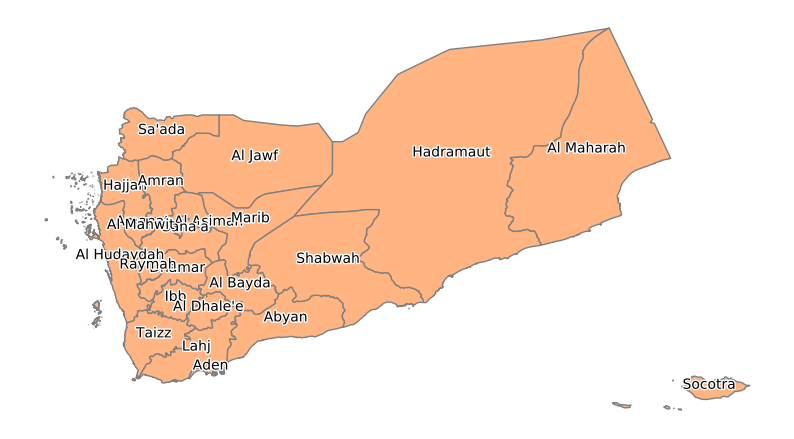

In [18]:
# Plot map.
draw_adminstratas(country = "Yemen", adminstratas = AdminStratas["Yemen"], adminstratas_to_highlight = None,
                  folder_to_shapefiles = "../1. Shape Files/output_shapefiles/Yemen/administrative_level_1/Yemen.shp", 
                  figsize = (10, 7), annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Yemen/map_conflict_yemen.png", 
                  dpi = 300)

- **Burkina Faso (BFA)**: Burkina Faso is divided into 13 administrative regions. The conflict dataframe has the values of all 13 administrative regions.

In [19]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['Centre', 'Sahel', 'Centre-Nord', 'Est', 'Cascades', 'Centre-Sud',
       'Sud-Ouest', 'Hauts-Bassins', 'Nord', 'Boucle-Du-Mouhoun',
       'Centre-Ouest', 'Centre-Est', 'Plateau-Central'], dtype=object)

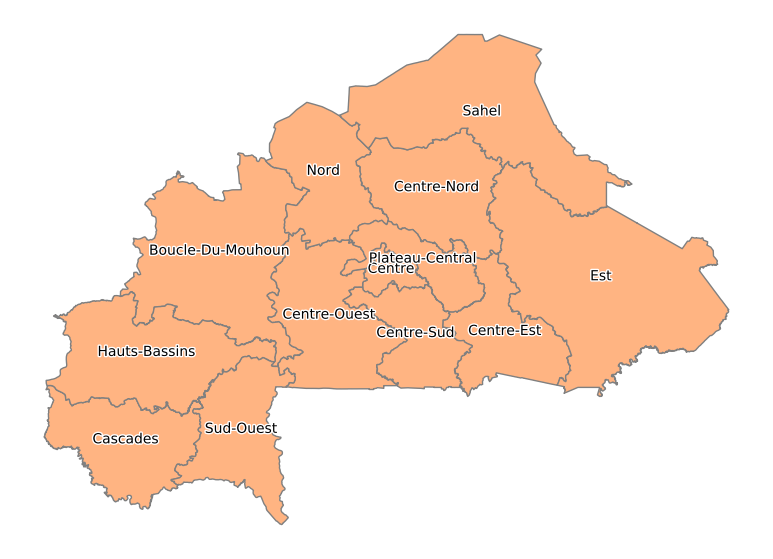

In [20]:
# Plot map.
draw_adminstratas(country = "Burkina Faso", adminstratas = AdminStratas["Burkina Faso"], adminstratas_to_highlight = None, 
                  folder_to_shapefiles = "../1. Shape Files/output_shapefiles/Burkina Faso/administrative_level_1/Burkina Faso.shp", 
                  figsize = (10, 7), annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Burkina Faso/map_conflict_burkina.png", 
                  dpi = 300)

- **Cameroon (CMR)**: the administrative regions of Cameroon are 10. The conflict dataframe has the values of all the 10 administrative regions.

In [21]:
print(AdminStratas["Cameroon"].shape)
AdminStratas["Cameroon"]

(10,)


array(['North-West', 'Far-North', 'South-West', 'Central', 'West',
       'Adamawa', 'Littoral', 'South', 'North', 'East'], dtype=object)

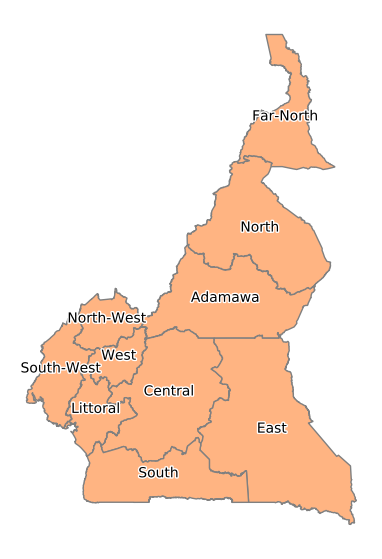

In [22]:
# Plot map.
draw_adminstratas(country = "Cameroon", adminstratas = AdminStratas["Cameroon"], adminstratas_to_highlight = None, 
                  folder_to_shapefiles = "../1. Shape Files/output_shapefiles/Cameroon/administrative_level_1/Cameroon.shp", 
                  figsize = (10, 7), annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Cameroon/map_conflict_cameroon.png", 
                  dpi = 300)

- **Mali (MLI)**: Mali is divided into eight regions and one capital district (Bamako). The AdminStrata items of the conflict dataframe cover all 9 regions.

N.B. The region 'Gao-Menaka' is considered as two different regions.

In [23]:
print(AdminStratas["Mali"].shape)
AdminStratas["Mali"]

(10,)


array(['Gao', 'Tombouctou-Taoudeni', 'Mopti', 'Kidal', 'Segou', 'Bamako',
       'Menaka', 'Sikasso', 'Kayes', 'Koulikoro'], dtype=object)

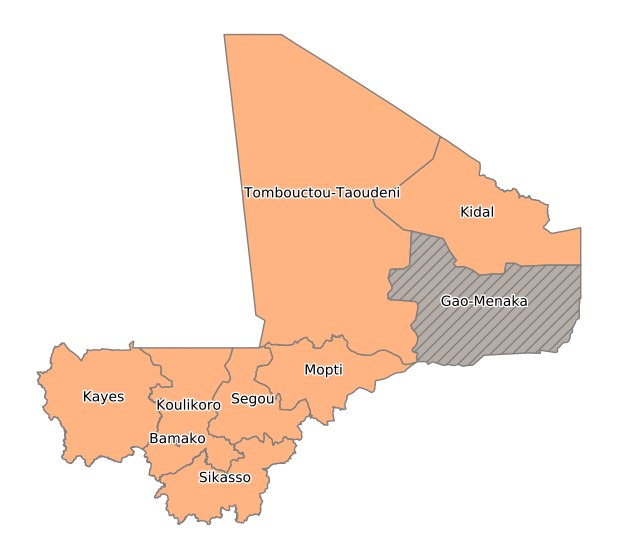

In [24]:
# Plot map.
draw_adminstratas(country = "Mali", adminstratas = AdminStratas["Mali"], adminstratas_to_highlight = None, 
                  folder_to_shapefiles = "../1. Shape Files/output_shapefiles/Mali/administrative_level_1/Mali.shp", 
                  figsize = (10, 7), annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Mali/map_conflict_mali.png", 
                  dpi = 300)

- **Niger (NER)**: the administrative regions of Niger are 8. The conflict dataframe has the values of all the 8 administrative regions.

In [25]:
print(AdminStratas["Niger"].shape)
AdminStratas["Niger"]

(8,)


array(['Diffa', 'Maradi', 'Tillaberi', 'Dosso', 'Tahoua', 'Agadez',
       'Niamey', 'Zinder'], dtype=object)

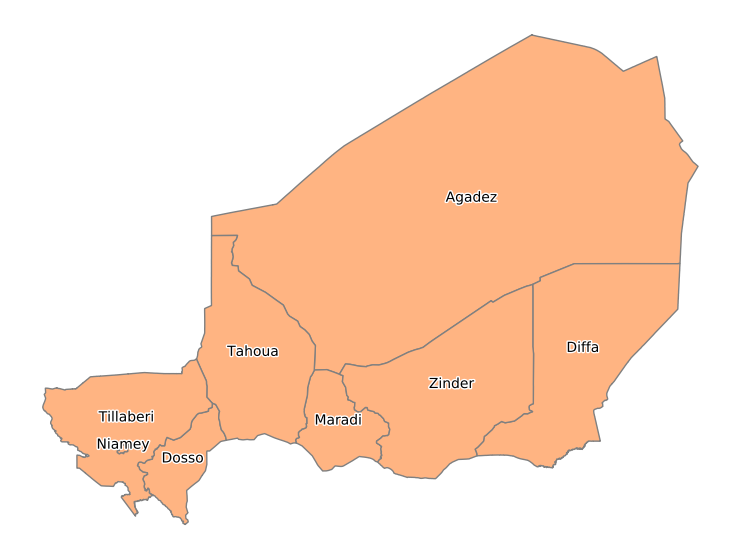

In [26]:
# Plot map.
draw_adminstratas(country = "Niger", adminstratas = AdminStratas["Niger"], adminstratas_to_highlight = None, 
                  folder_to_shapefiles = "../1. Shape Files/output_shapefiles/Niger/administrative_level_1", figsize = (10, 7), annotation = True, 
                  annotation_selected = True, path_to_save = PATH_TO_SAVE_DATA + "Niger/map_conflict_niger.png", dpi = 300)

- **Nigeria (NGA)**: Nigeria is divided into 36 administrative regions. It also includes The Federal Capital Territory that is under the direct control of the federal government. The conflict dataframe has the values of all 37 administrative regions.

In [27]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(38,)


array(['Borno', 'Zamfara', 'Oyo', 'Katsina', 'Ondo', 'Benue',
       'Federal Capital Territory', 'Osun', 'Niger', 'Rivers', 'Abia',
       'Nassarawa', 'Delta', 'Taraba', 'Kaduna', 'Imo', 'Anambra',
       'Enugu', 'Yobe', 'Adamawa', 'Lagos', 'Plateau', 'Edo', 'Sokoto',
       'Bayelsa', 'Kogi', 'Kebbi', 'Cross River', 'Ebonyi', 'Nasarawa',
       'Ekiti', 'Kwara', 'Kano', 'Akwa Ibom', 'Ogun', 'Jigawa', 'Gombe',
       'Bauchi'], dtype=object)

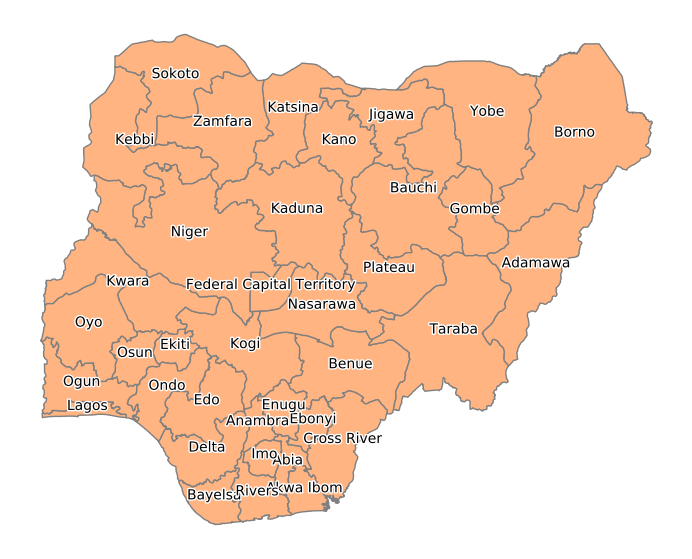

In [28]:
# Plot map.
draw_adminstratas(country = "Nigeria", adminstratas = AdminStratas["Nigeria"], adminstratas_to_highlight = None, 
                  folder_to_shapefiles = "../1. Shape Files/output_shapefiles/Nigeria/administrative_level_1", 
                  figsize = (10, 7), annotation = True, annotation_selected = True, path_to_save = PATH_TO_SAVE_DATA + "Nigeria/map_conflict_nigeria.png", 
                  dpi = 300)

- **Syria (SYR)**: the administrative regions of the Syria country are 14. The conflicts dataframe has the values of all 14 administrative regions.

In [29]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(14,)


array(['Idleb', 'Aleppo', 'Rural Damascus', 'Al-Hasakeh', 'Deir-ez-Zor',
       'Ar-Raqqa', "Dar'a", 'Hama', 'Lattakia', 'Quneitra', 'Homs',
       'As-Sweida', 'Damascus', 'Tartous'], dtype=object)

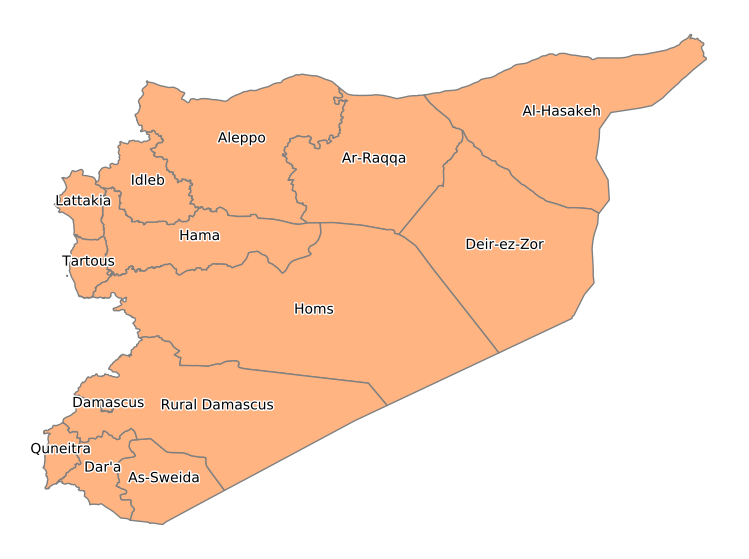

In [30]:
# Plot map.
draw_adminstratas(country = "Syria", adminstratas = AdminStratas["Syria"], adminstratas_to_highlight = None, 
                  folder_to_shapefiles = "../1. Shape Files/output_shapefiles/Syria/administrative_level_1/Syria.shp", 
                  figsize = (10, 7), annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Syria/map_conflict_syria.png", 
                  dpi = 300)

## Creation of the time-series

We decide to focus on the number of fatalities to build our time-series.

In [31]:
# Convert to an appropriate datetime format.
df["Datetime"] = pd.to_datetime(df.Datetime)
df.sort_values("Datetime", ascending = True, inplace = True) 
df.reset_index(drop = True, inplace = True)
df.head()

,Country,Datetime,Event type,Subevent type,AdminStrata,Fatalities,latitude,longitude
0,Mali,2017-01-01,Battles,Armed clash,Tombouctou-Taoudeni,0,15.8196,-1.2911
1,Nigeria,2017-01-01,Strategic develo...,Disrupted weapon...,Borno,1,11.8312,13.1517
2,Nigeria,2017-01-01,Violence against...,Attack,Lagos,3,6.6155,3.5087
3,Cameroon,2017-01-02,Battles,Armed clash,Far-North,2,11.0892,13.8537
4,Cameroon,2017-01-02,Explosions/Remot...,Remote explosive...,Far-North,1,11.1343,14.1417


In [32]:
# Check if the dataframe contains some NaN values.
df.isnull().sum()

Country          0
Datetime         0
Event type       0
Subevent type    0
AdminStrata      0
Fatalities       0
latitude         0
longitude        0
dtype: int64

In [33]:
# Group the information with multiple information at the same location and datetime keeping median of the fatalities. 
df = df.groupby(["Country", "AdminStrata", "Event type", "Subevent type", "Datetime", "latitude", "longitude"]).median().reset_index()
df.drop(["latitude", "longitude"], axis = 1, inplace = True)

In [34]:
# Create appropriate time-series subgroups with an appropriate datetime object resampled to day keeping sum fatalities if occurred in the same day of the same administrative region and subevent. 
df = df.groupby(["Country", "AdminStrata", "Event type", "Subevent type"]).apply(lambda group: group.set_index("Datetime").resample("D").sum()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Event type,Subevent type,Datetime,Fatalities
0,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-03-17,1.0
1,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-03-18,0.0
2,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-03-19,0.0
3,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-03-20,0.0
4,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-03-21,0.0


In [35]:
# Create a dataframe with multi-index column in order to have a summary dataframe of the time-series.
df = df.set_index(["Datetime", "Country", "AdminStrata", "Event type", "Subevent type"]).unstack(["Country", "AdminStrata", "Event type", "Subevent type"])
df.columns = df.columns.droplevel(0)
freq = "D"
df.index.freq = freq
df.head()

Country            Burkina Faso                                \
AdminStrata   Boucle-Du-Mouhoun                                 
Event type              Battles    Explosions/Remote violence   
Subevent type       Armed clash Remote explosive/landmine/IED   
Datetime                                                        
2017-01-01                  NaN                  NaN            
2017-01-02                  NaN                  NaN            
2017-01-03                  NaN                  NaN            
2017-01-04                  NaN                  NaN            
2017-01-05                  NaN                  NaN            

Country                                                            \
AdminStrata                                                         
Event type            Protests        Riots                         
Subevent type Peaceful protest Mob violence Violent demonstration   
Datetime                                                            
2017-01-01                 NaN          NaN                  NaN    
2017-01-02                 NaN          NaN                  NaN    
2017-01-03                 NaN          NaN                  NaN    
2017-01-04                 NaN          NaN                  NaN    
2017-01-05                 NaN          NaN                  NaN    

Country                                                            \
AdminStrata                                                         
Event type    Strategic developments                                
Subevent type  Disrupted weapons use Looting/property destruction   
Datetime                                                            
2017-01-01                     NaN                    NaN           
2017-01-02                     NaN                    NaN           
2017-01-03                     NaN                    NaN           
2017-01-04                     NaN                    NaN           
2017-01-05                     NaN                    NaN           

Country                                                              ...  \
AdminStrata                                                          ...   
Event type        Violence against civilians                         ...   
Subevent type Abduction/forced disappearance Attack Sexual violence  ...   
Datetime                                                             ...   
2017-01-01                     NaN              NaN             NaN  ...   
2017-01-02                     NaN              NaN             NaN  ...   
2017-01-03                     NaN              NaN             NaN  ...   
2017-01-04                     NaN              NaN             NaN  ...   
2017-01-05                     NaN              NaN             NaN  ...   

Country                        Yemen                           \
AdminStrata                    Taizz                            
Event type    Strategic developments                            
Subevent type                Arrests Change to group/activity   
Datetime                                                        
2017-01-01                     NaN                    NaN       
2017-01-02                     NaN                    NaN       
2017-01-03                     NaN                    NaN       
2017-01-04                     NaN                    NaN       
2017-01-05                     NaN                    NaN       

Country                                                               \
AdminStrata                                                            
Event type                                                             
Subevent type Disrupted weapons use Headquarters or base established   
Datetime                                                               
2017-01-01                     NaN                   NaN               
2017-01-02                     NaN                   NaN               
2017-01-03                     NaN                 

N.B. We decide to fill the NaN values of the fatalities with the value 0 (0 fatalities ascertained by ACLED).

In [36]:
df.fillna(value = 0, inplace = True)
df.head()

Country            Burkina Faso                                \
AdminStrata   Boucle-Du-Mouhoun                                 
Event type              Battles    Explosions/Remote violence   
Subevent type       Armed clash Remote explosive/landmine/IED   
Datetime                                                        
2017-01-01                  0.0                  0.0            
2017-01-02                  0.0                  0.0            
2017-01-03                  0.0                  0.0            
2017-01-04                  0.0                  0.0            
2017-01-05                  0.0                  0.0            

Country                                                            \
AdminStrata                                                         
Event type            Protests        Riots                         
Subevent type Peaceful protest Mob violence Violent demonstration   
Datetime                                                            
2017-01-01                 0.0          0.0                  0.0    
2017-01-02                 0.0          0.0                  0.0    
2017-01-03                 0.0          0.0                  0.0    
2017-01-04                 0.0          0.0                  0.0    
2017-01-05                 0.0          0.0                  0.0    

Country                                                            \
AdminStrata                                                         
Event type    Strategic developments                                
Subevent type  Disrupted weapons use Looting/property destruction   
Datetime                                                            
2017-01-01                     0.0                    0.0           
2017-01-02                     0.0                    0.0           
2017-01-03                     0.0                    0.0           
2017-01-04                     0.0                    0.0           
2017-01-05                     0.0                    0.0           

Country                                                              ...  \
AdminStrata                                                          ...   
Event type        Violence against civilians                         ...   
Subevent type Abduction/forced disappearance Attack Sexual violence  ...   
Datetime                                                             ...   
2017-01-01                     0.0              0.0             0.0  ...   
2017-01-02                     0.0              0.0             0.0  ...   
2017-01-03                     0.0              0.0             0.0  ...   
2017-01-04                     0.0              0.0             0.0  ...   
2017-01-05                     0.0              0.0             0.0  ...   

Country                        Yemen                           \
AdminStrata                    Taizz                            
Event type    Strategic developments                            
Subevent type                Arrests Change to group/activity   
Datetime                                                        
2017-01-01                     0.0                    0.0       
2017-01-02                     0.0                    0.0       
2017-01-03                     0.0                    0.0       
2017-01-04                     0.0                    0.0       
2017-01-05                     0.0                    0.0       

Country                                                               \
AdminStrata                                                            
Event type                                                             
Subevent type Disrupted weapons use Headquarters or base established   
Datetime                                                               
2017-01-01                     0.0                   0.0               
2017-01-02                     0.0                   0.0               
2017-01-03                     0.0                 

In [37]:
# Plot time-series.
TsIP(df).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [38]:
# Now save the time-series of each country keeping as indeces for each time-series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [39]:
# Save time-series.
df.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts"));

Reduce the Event taking only the 'Event type' summing the corresponding 'Subevent type'.

In [40]:
# Reduce the Event tanking only the 'Event type' summing the corresponding 'Subevent type'.
df_event = df.groupby(level = [0, 1, 2], axis = 1).sum()
df_event.head()

Country          Burkina Faso                                            \
AdminStrata Boucle-Du-Mouhoun                                             
Event type            Battles Explosions/Remote violence Protests Riots   
Datetime                                                                  
2017-01-01                0.0                  0.0            0.0   0.0   
2017-01-02                0.0                  0.0            0.0   0.0   
2017-01-03                0.0                  0.0            0.0   0.0   
2017-01-04                0.0                  0.0            0.0   0.0   
2017-01-05                0.0                  0.0            0.0   0.0   

Country                                                                 \
AdminStrata                                                   Cascades   
Event type  Strategic developments Violence against civilians  Battles   
Datetime                                                                 
2017-01-01                   0.0                    0.0            0.0   
2017-01-02                   0.0                    0.0            0.0   
2017-01-03                   0.0                    0.0            0.0   
2017-01-04                   0.0                    0.0            0.0   
2017-01-05                   0.0                    0.0            0.0   

Country                                                ...    Yemen        \
AdminStrata                                            ...  Socotra         
Event type  Explosions/Remote violence Protests Riots  ... Protests Riots   
Datetime                                               ...                  
2017-01-01                   0.0            0.0   0.0  ...      0.0   0.0   
2017-01-02                   0.0            0.0   0.0  ...      0.0   0.0   
2017-01-03                   0.0            0.0   0.0  ...      0.0   0.0   
2017-01-04                   0.0            0.0   0.0  ...      0.0   0.0   
2017-01-05                   0.0            0.0   0.0  ...      0.0   0.0   

Country                                                                \
AdminStrata                                                     Taizz   
Event type  Strategic developments Violence against civilians Battles   
Datetime                                                                
2017-01-01                   0.0                    0.0           0.0   
2017-01-02                   0.0                    0.0           0.0   
2017-01-03                   0.0                    0.0           0.0   
2017-01-04                   0.0                    0.0           0.0   
2017-01-05                   0.0                    0.0           0.0   

Country                                                                       \
AdminStrata                                                                    
Event type  Explosions/Remote violence Protests Riots Strategic developments   
Datetime                                                                       
2017-01-01                   0.0            0.0   0.0                  0.0     
2017-01-02                   0.0            0.0   0.0                  0.0     
2017-01-03                   0.0            0.0   0.0                  0.0     
2017-01-04                   0.0            0.0   0.0                  0.0     
2017-01-05                   0.0            0.0   0.0                  0.0     

Country                                 
AdminStrata                             
Event type  Violence against civilians  
Datetime                                
2017-01-01                   0.0        
2017-01-02                   0.0        
2017-01-03                   0.0        
2017-01-04                   0.0        
2017-01-05                   0.0        

[5 rows x 624 columns]

In [41]:
# Plot time-series.
TsIP(df_event).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [42]:
# Save time-series.
df_event.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts_event"));

## Unique conflict indicator

We decide to create a unique indicator for the fatalities summing over all 'Event' types for each administrative region.

In [43]:
# I decide to create a unique indicator for the fatalities for each adminstrata.
def sum_event_fatalities(group):
    group = group.sum(axis = 1)
    return group

df_sum_event = df_event.groupby(level = [0, 1], axis = 1).apply(sum_event_fatalities)
df_sum_event.columns = pd.MultiIndex.from_tuples(list(map(lambda x: tuple([x[0], x[1], "Fatalities"]), df_sum_event.columns)), names = ["Country", "AdminStrata", "Indicator"])
df_sum_event.head()

Country          Burkina Faso                                               \
AdminStrata Boucle-Du-Mouhoun   Cascades     Centre Centre-Est Centre-Nord   
Indicator          Fatalities Fatalities Fatalities Fatalities  Fatalities   
Datetime                                                                     
2017-01-01                0.0        0.0        0.0        0.0         0.0   
2017-01-02                0.0        0.0        0.0        0.0         0.0   
2017-01-03                0.0        0.0        0.0        0.0         0.0   
2017-01-04                0.0        0.0        0.0        0.0         0.0   
2017-01-05                0.0        0.0        0.0        0.0         0.0   

Country                                                                  ...  \
AdminStrata Centre-Ouest Centre-Sud        Est Hauts-Bassins       Nord  ...   
Indicator     Fatalities Fatalities Fatalities    Fatalities Fatalities  ...   
Datetime                                                                 ...   
2017-01-01           0.0        0.0        0.0           0.0        0.0  ...   
2017-01-02           0.0        0.0        0.0           0.0        0.0  ...   
2017-01-03           0.0        0.0        0.0           0.0        0.0  ...   
2017-01-04           0.0        0.0        0.0           0.0        0.0  ...   
2017-01-05           0.0        0.0        0.0           0.0        0.0  ...   

Country          Yemen                                                         \
AdminStrata     Hajjah        Ibb       Lahj      Marib     Raymah     Sa'ada   
Indicator   Fatalities Fatalities Fatalities Fatalities Fatalities Fatalities   
Datetime                                                                        
2017-01-01         0.0        0.0        0.0        0.0        0.0        0.0   
2017-01-02         0.0        0.0        0.0        0.0        0.0        0.0   
2017-01-03         0.0        0.0        0.0        0.0        0.0        0.0   
2017-01-04         0.0        0.0        0.0        0.0        0.0        0.0   
2017-01-05         0.0        0.0        0.0        0.0        0.0        0.0   

Country                                                  
AdminStrata     Sana'a    Shabwah    Socotra      Taizz  
Indicator   Fatalities Fatalities Fatalities Fatalities  
Datetime                                                 
2017-01-01         0.0        0.0        0.0        0.0  
2017-01-02         0.0        0.0        0.0        0.0  
2017-01-03         0.0        0.0        0.0        0.0  
2017-01-04         0.0        0.0        0.0        0.0  
2017-01-05         0.0        0.0        0.0        0.0  

[5 rows x 115 columns]

In [44]:
# Plot time-series.
TsIP(df_sum_event).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Cameroon', 'Mali', 'Niger…

In [45]:
# Save time-series.
df_sum_event.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts_sum_event"));

## Adjustment of the conflicts time-series to the time coverage of the FCG <= 2 analysis

Now, we manage the current data keeping only the administrative regions present in the FCG <= 2 analysis. Furthermore, we aggregate data following the FCG <= 2 data collection: the FCG <= 2 value of a certain province corresponding to a referece date does not correspond to the percentage of poor and borderline people on that day, but in a greater time range. 

In [46]:
def SvyDate_agg(group):
    country = group.name[0]
    adminstrata = group.name[1]
    indicator = group.name[2]
    group = group.loc[group.first_valid_index():group.last_valid_index()]
    # Load the information regarding the FCG <= 2 survey.
    fcs_coverage = pd.read_csv("../2. Food Consumption Score (FCS)/output_timeseries/%s/wfp_fcs-SvyDateRange.csv" % country, header = [0, 1], index_col = 0)
    fcs_coverage.index = pd.to_datetime(fcs_coverage.index)
    # Ignore the adminstrata not considered in the FCG <= 2 survey.
    if adminstrata in fcs_coverage.columns.get_level_values(0).unique():
        fcs_coverage_adminstrata = fcs_coverage[adminstrata].loc[fcs_coverage[adminstrata].first_valid_index():fcs_coverage[adminstrata].last_valid_index()]
        # Sliding window according to the coverage of the FCG <= 2 analysis..
        start_svy = fcs_coverage_adminstrata.index[0]
        end_svy = fcs_coverage_adminstrata.index[-1]
        new_group = group.loc[start_svy:end_svy].copy()
        for index in new_group.index:
            look_back = int(fcs_coverage_adminstrata.loc[index].values[0])
            # Window over the column.
            new_group.loc[index] = group.loc[index-(look_back-1)*group.index.freq:index].sum() 
        return new_group
    else:
        pass
    
df_sum_event_SvyWindow = df_sum_event.groupby(level = [0, 1, 2], axis = 1, group_keys = False).apply(SvyDate_agg)
df_sum_event_SvyWindow.head()

Country          Burkina Faso                                               \
AdminStrata Boucle-Du-Mouhoun   Cascades     Centre Centre-Est Centre-Nord   
Indicator          Fatalities Fatalities Fatalities Fatalities  Fatalities   
Datetime                                                                     
2018-07-02                NaN        NaN        NaN        NaN         NaN   
2018-07-03                NaN        NaN        NaN        NaN         NaN   
2018-07-04                NaN        NaN        NaN        NaN         NaN   
2018-07-05                NaN        NaN        NaN        NaN         NaN   
2018-07-06                NaN        NaN        NaN        NaN         NaN   

Country                                                                  ...  \
AdminStrata Centre-Ouest Centre-Sud        Est Hauts-Bassins       Nord  ...   
Indicator     Fatalities Fatalities Fatalities    Fatalities Fatalities  ...   
Datetime                                                                 ...   
2018-07-02           NaN        NaN        NaN           NaN        NaN  ...   
2018-07-03           NaN        NaN        NaN           NaN        NaN  ...   
2018-07-04           NaN        NaN        NaN           NaN        NaN  ...   
2018-07-05           NaN        NaN        NaN           NaN        NaN  ...   
2018-07-06           NaN        NaN        NaN           NaN        NaN  ...   

Country          Yemen                                                         \
AdminStrata     Hajjah        Ibb       Lahj      Marib     Raymah     Sa'ada   
Indicator   Fatalities Fatalities Fatalities Fatalities Fatalities Fatalities   
Datetime                                                                        
2018-07-02       136.0        3.0       99.0       97.0        0.0      578.0   
2018-07-03       124.0        3.0      105.0       97.0        0.0      581.0   
2018-07-04       124.0       11.0      105.0       97.0        0.0      542.0   
2018-07-05       123.0       11.0      111.0       97.0        0.0      546.0   
2018-07-06       113.0       11.0      121.0       97.0        0.0      546.0   

Country                                                  
AdminStrata     Sana'a    Shabwah    Socotra      Taizz  
Indicator   Fatalities Fatalities Fatalities Fatalities  
Datetime                                                 
2018-07-02       155.0        7.0        0.0      400.5  
2018-07-03       160.0        7.0        0.0      403.5  
2018-07-04       166.0       12.0        0.0      393.5  
2018-07-05       176.0       12.0        0.0      385.5  
2018-07-06       186.0       19.0        0.0      385.5  

[5 rows x 76 columns]

In [47]:
# Plot time-series.
TsIP(df_sum_event_SvyWindow).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Cameroon', 'Mali', 'Niger…

In [48]:
# Save time-series.
df_sum_event_SvyWindow.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts_sum_event_SvyWindow"));

In [49]:
def full_extent(ax, pad = 0.0):
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    bbox = Bbox.union([item.get_window_extent() for item in items])
    return bbox.expanded(1.0 + pad, 1.0 + pad)

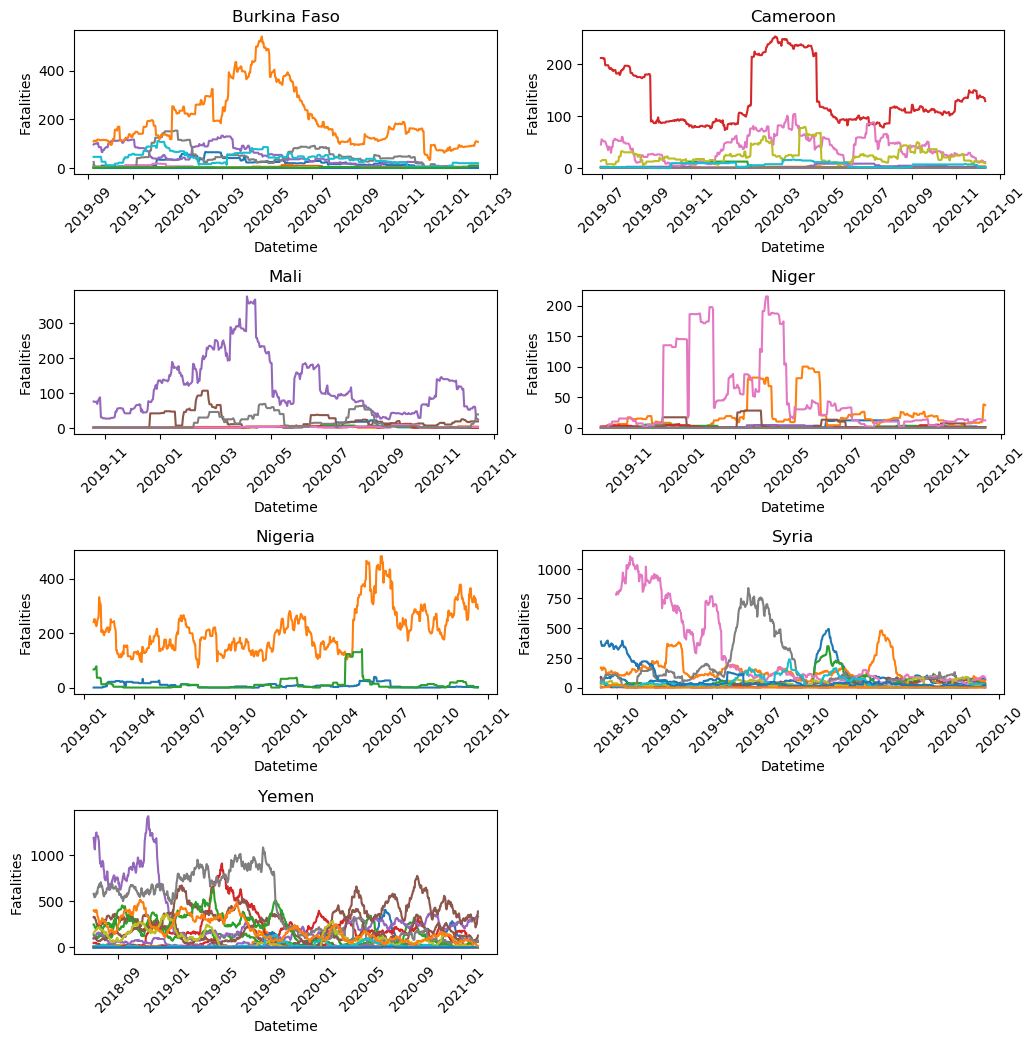

In [50]:
# Plot the original time-series of the fatalities indicator for each country.
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.8)
axs = axs.ravel()
for i, country in enumerate(df_sum_event_SvyWindow.columns.get_level_values(0).unique()):
    axs[i].plot(df_sum_event_SvyWindow[country])
    axs[i].set_title(country)
    axs[i].set_xlabel("Datetime")
    axs[i].set_ylabel("Fatalities")
    axs[i].tick_params(axis = "x", labelrotation = 45)
    # Save just the portion of the current axes.
    extent = full_extent(axs[i]).transformed(fig.dpi_scale_trans.inverted())
    extent = axs[i].get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(PATH_TO_SAVE_DATA + "%s/ts_conflict_%s.png" % (country, country), bbox_inches = extent, dpi = 300)
# Remove extra plot.
axs[-1].set_axis_off()

In [51]:
# Save the figure.
fig.savefig(PATH_TO_SAVE_DATA + "ts.png", dpi = 300)

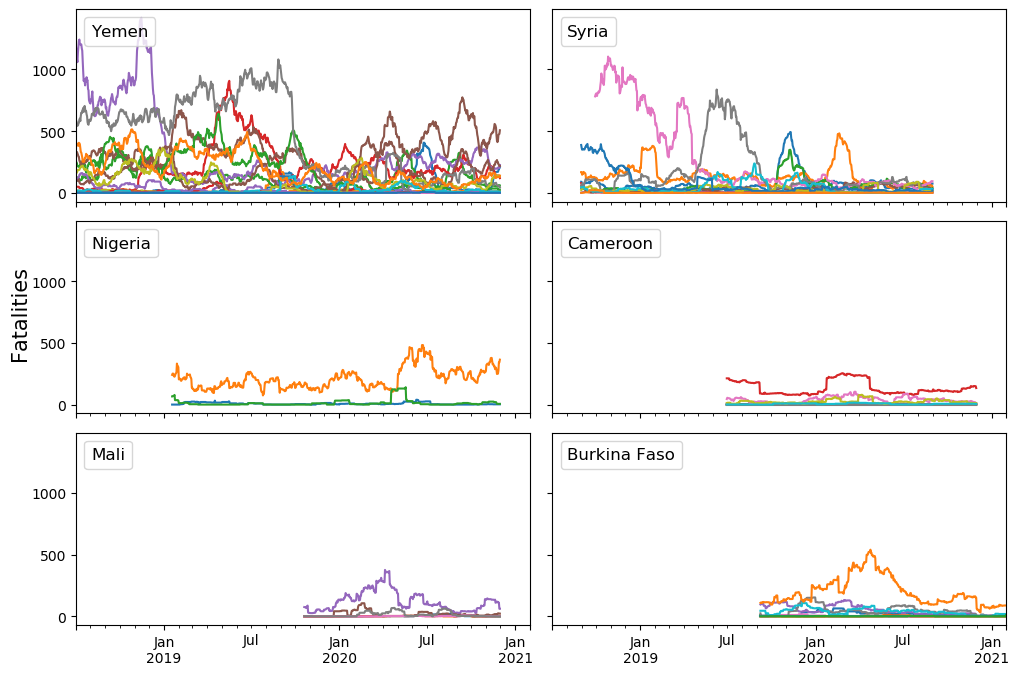

In [54]:
# Define the end reference end period of forecasting analysis.
ref_str = {"Yemen": "2018-07-02", "Syria": "2018-08-31", "Nigeria": "2019-01-18", 
           "Cameroon": "2019-06-30", "Mali": "2019-10-20", "Burkina Faso": "2019-09-08"}
ref_end = {"Yemen": "2020-11-30", "Syria": "2020-08-31", "Nigeria": "2020-11-30", 
           "Cameroon": "2020-11-30", "Mali": "2020-11-30", "Burkina Faso": "2021-01-31"}

# Plot the original time-series of the FCG indicator for each country.
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 8), sharex = True, sharey = True)
fig.subplots_adjust(hspace = .1, wspace = .05)
axs = axs.ravel()
for i, country in enumerate(ref_end.keys()):
    df_plot = df_sum_event_SvyWindow[country].loc[ref_str[country]:ref_end[country]]
    df_plot.xs("Fatalities", axis = 1, level = 1, drop_level = False).plot(ax = axs[i], style = "-")
    axs[i].set_xlabel("")
    axs[i].legend_ = None
    axs[i].set_xlim("2018-07-02", "2021-01-31")
    # Legend.
    item = Line2D([0], [0], label = country, color = "k")
    item.set_visible(False)
    axs[i].legend(handles = [item], loc = "upper left", handlelength = 0, 
                  handletextpad = 0, fancybox = True, prop = {"size": 12})

fig.text(0.07, 0.5, "Fatalities", va = "center", rotation = "vertical", 
         fontdict = {"size": 15});

In [55]:
# Save the figure.
fig.savefig(PATH_TO_SAVE_DATA + "ts_forecasting_analysis.png", dpi = 300, bbox_inches = "tight")